# Project Objective

To show the correlation between expected goals (xG) and points gained per season, to show why expected goals is the best metric to use in football to gauge the performance levels of a particular team, compared to other stats such as shots or shots on target. 
This will be achieved by
* Downloading and cleaning Premier League match datasets over the past 5 seasons
* Transforming the match data into seasonal totals and 5 season averages
* Visualizing the data in barplots and regression plots
* Creating regression models displaying the correlation accuracy of xG, vs shots and shots on target

# Expected Goals Defintion
Expected goals (or xG) measures the quality of a chance by calculating the likelihood that it will be scored from a particular position on the pitch during a particular phase of play

# Step 1: Importing Datasets and Understanding the Data
Let us first import Pandas, and the dataset containing xG data

In [2]:
import pandas as pd

In [3]:
#My first dataset will be the match scores containing xG figures for the last 5 seasons
df1= pd.read_csv('Premier League Scores.csv')


In [4]:
#Check first 5 rows of dataset
df1.head()

,Unnamed: 0,day,date,time,home,xg_home,score,xg_away,away,attendance,venue,referee
0,0,Fri,13/08/2021,20:00,Brentford,1.3,2–0,1.4,Arsenal,16479.0,Brentford Community Stadium,Michael Oliver
1,1,Sat,14/08/2021,12:30,Manchester Utd,1.5,5–1,0.6,Leeds United,72732.0,Old Trafford,Paul Tierney
2,2,Sat,14/08/2021,15:00,Watford,1.2,3–2,1.1,Aston Villa,20051.0,Vicarage Road Stadium,Mike Dean
3,3,Sat,14/08/2021,15:00,Chelsea,0.9,3–0,0.3,Crystal Palace,38965.0,Stamford Bridge,Jonathan Moss
4,4,Sat,14/08/2021,15:00,Everton,2.4,3–1,0.7,Southampton,38487.0,Goodison Park,Andy Madley


In [5]:
#Check shape of dataset- should be 1900 rows, 380 per season, 5 seasons
print(df1.shape)

(1900, 12)


In [6]:
#Using RegEx I want to find how many of the 1900 games have been played on a weekend
import re
import numpy as np
df1[df1['day'].str.count('^[sS].*')>0]
#Answer is 1389, which is 73% of games

,Unnamed: 0,day,date,time,home,xg_home,score,xg_away,away,attendance,venue,referee
1,1,Sat,14/08/2021,12:30,Manchester Utd,1.5,5–1,0.6,Leeds United,72732.0,Old Trafford,Paul Tierney
2,2,Sat,14/08/2021,15:00,Watford,1.2,3–2,1.1,Aston Villa,20051.0,Vicarage Road Stadium,Mike Dean
3,3,Sat,14/08/2021,15:00,Chelsea,0.9,3–0,0.3,Crystal Palace,38965.0,Stamford Bridge,Jonathan Moss
4,4,Sat,14/08/2021,15:00,Everton,2.4,3–1,0.7,Southampton,38487.0,Goodison Park,Andy Madley
5,5,Sat,14/08/2021,15:00,Burnley,1.0,1–2,1.3,Brighton,16910.0,Turf Moor,David Coote
...,...,...,...,...,...,...,...,...,...,...,...,...
1895,2150,Sun,13/05/2018,15:00,West Ham,0.9,3–1,1.7,Everton,56926.0,London Stadium,Graham Scott
1896,2151,Sun,13/05/2018,15:00,Huddersfield,1.5,0–1,2.1,Arsenal,24122.0,The John Smith's Stadium,Michael Oliver
1897,2152,Sun,13/05/2018,15:00,Tottenham,2.2,5–4,1.7,Leicester City,77841.0,Wembley Stadium,Craig Pawson
1898,2153,Sun,13/05/2018,15:00,Crystal Palace,2.4,2–0,0.3,West Brom,25357.0,Selhurst Park,Jonathan Moss


In [7]:
#I want to rename column names, to match the next dataframes column names
df1_cleaned= df1.rename(columns={'home' : 'HomeTeam', 'away' : 'AwayTeam', 'date' : 'Date', 'time' : 'Time'})
df1_cleaned.head()

,Unnamed: 0,day,Date,Time,HomeTeam,xg_home,score,xg_away,AwayTeam,attendance,venue,referee
0,0,Fri,13/08/2021,20:00,Brentford,1.3,2–0,1.4,Arsenal,16479.0,Brentford Community Stadium,Michael Oliver
1,1,Sat,14/08/2021,12:30,Manchester Utd,1.5,5–1,0.6,Leeds United,72732.0,Old Trafford,Paul Tierney
2,2,Sat,14/08/2021,15:00,Watford,1.2,3–2,1.1,Aston Villa,20051.0,Vicarage Road Stadium,Mike Dean
3,3,Sat,14/08/2021,15:00,Chelsea,0.9,3–0,0.3,Crystal Palace,38965.0,Stamford Bridge,Jonathan Moss
4,4,Sat,14/08/2021,15:00,Everton,2.4,3–1,0.7,Southampton,38487.0,Goodison Park,Andy Madley


### 1.1 Cleaning first Dataset
Check for any missing data, and drop unnecessary columns

In [8]:
#Cleaning the data by checking for any null values
df1_cleaned.isnull().sum().sort_values(ascending = False)

attendance    440
Unnamed: 0      0
day             0
Date            0
Time            0
HomeTeam        0
xg_home         0
score           0
xg_away         0
AwayTeam        0
venue           0
referee         0
dtype: int64

In [9]:
#Attendance is the only column with null values, so let's check the average attendance so we can fill values
df1_cleaned['attendance'].mean()

38066.77397260274

In [10]:
df2_cleaned= df1_cleaned.fillna(38066)

In [11]:
#Check again for null values, all looks good
df2_cleaned.isnull().sum().sort_values(ascending = False)

Unnamed: 0    0
day           0
Date          0
Time          0
HomeTeam      0
xg_home       0
score         0
xg_away       0
AwayTeam      0
attendance    0
venue         0
referee       0
dtype: int64

In [12]:
#Drop any columns I don't need- only need teams, xg stats and date for merging
df1_cleaned1= df2_cleaned.drop(columns=['attendance', 'venue', 'referee', 'score', 'day', 'Unnamed: 0', 'Time'])
df1_cleaned1

,Date,HomeTeam,xg_home,xg_away,AwayTeam
0,13/08/2021,Brentford,1.3,1.4,Arsenal
1,14/08/2021,Manchester Utd,1.5,0.6,Leeds United
2,14/08/2021,Watford,1.2,1.1,Aston Villa
3,14/08/2021,Chelsea,0.9,0.3,Crystal Palace
4,14/08/2021,Everton,2.4,0.7,Southampton
...,...,...,...,...,...
1895,13/05/2018,West Ham,0.9,1.7,Everton
1896,13/05/2018,Huddersfield,1.5,2.1,Arsenal
1897,13/05/2018,Tottenham,2.2,1.7,Leicester City
1898,13/05/2018,Crystal Palace,2.4,0.3,West Brom


In [13]:
#Making sure 1900 rows remain, with just 5 columns
df1_cleaned1.shape

(1900, 5)

### 1.2 Upload and Clean next 5 datasets
* Upload datasets and add Season column to each
* Concatenate all 5 datasets
* Clean data and remove unnecessary columns

In [14]:
#uploading the 5 seasons worth of data to get scores/shots
#then merge the 5 datasets together
df2= pd.read_csv('21.22 season stats.csv')

In [15]:
#check top rows
df2.insert(loc=2,
          column='Season',
          value=1)
df2.head()

,Div,Date,Season,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,13/08/2021,1,20:00,Brentford,Arsenal,2,0,H,1,...,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,E0,14/08/2021,1,12:30,Man United,Leeds,5,1,H,1,...,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,E0,14/08/2021,1,15:00,Burnley,Brighton,1,2,A,1,...,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,E0,14/08/2021,1,15:00,Chelsea,Crystal Palace,3,0,H,2,...,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,E0,14/08/2021,1,15:00,Everton,Southampton,3,1,H,0,...,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86


In [16]:
#2021
df3= pd.read_csv('20.21 season stats.csv')

In [17]:
df3.insert(loc=2,
          column='Season',
          value=2)
df3.head(5)

,Div,Date,Season,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,2,12:30,Fulham,Arsenal,0,3,A,0,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,2,15:00,Crystal Palace,Southampton,1,0,H,1,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,2,17:30,Liverpool,Leeds,4,3,H,3,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,2,20:00,West Ham,Newcastle,0,2,A,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,2,14:00,West Brom,Leicester,0,3,A,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97


In [18]:
#This df was short, so found an updated one with all games here 
#https://www.kaggle.com/datasets/thedevastator/uncovering-betting-patterns-in-the-premier-leagu?select=2019.csv
df4= pd.read_csv('19.20 season stats.csv')
df4.insert(loc=2,
          column='Season',
          value=3)
print(df4.shape)

(380, 107)


In [19]:
#18/19- This df was also short, and I have used the above link for this also
df5= pd.read_csv('18.19 season stats.csv')
df5.insert(loc=2,
          column='Season',
          value=4)
df5.head()

,Div,Date,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,4,Man United,Leicester,2,1,H,1,0,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,4,Bournemouth,Cardiff,2,0,H,1,0,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,4,Fulham,Crystal Palace,0,2,A,0,1,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,4,Huddersfield,Chelsea,0,3,A,0,2,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,4,Newcastle,Tottenham,1,2,A,1,2,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


In [20]:
#17/18
df6= pd.read_csv('17.18 season stats.csv')
df6.insert(loc=2,
          column='Season',
          value=5)
df6.head()

,Div,Date,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,11/08/2017,5,Arsenal,Leicester,4,3,H,2,2,...,2.32,21,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25
1,E0,12/08/2017,5,Brighton,Man City,0,2,A,0,0,...,2.27,20,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29
2,E0,12/08/2017,5,Chelsea,Burnley,2,3,A,0,3,...,2.23,20,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25
3,E0,12/08/2017,5,Crystal Palace,Huddersfield,0,3,A,0,2,...,1.72,18,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51
4,E0,12/08/2017,5,Everton,Stoke,1,0,H,1,0,...,1.76,19,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42


In [21]:
concat_data=pd.concat([df2, df3, df4, df5, df6])

In [22]:
#Should be 1900 rows after concatenating dataframes
concat_data.shape

(1900, 128)

In [23]:
#Now I want to remove columns at the end of the concatenated dataframe
df_all = concat_data.iloc[:, 1:24]
df_all.head()

,Date,Season,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
0,13/08/2021,1,20:00,Brentford,Arsenal,2,0,H,1,0,...,22,3,4,12,8,2,5,0,0,0
1,14/08/2021,1,12:30,Man United,Leeds,5,1,H,1,0,...,10,8,3,11,9,5,4,1,2,0
2,14/08/2021,1,15:00,Burnley,Brighton,1,2,A,1,0,...,14,3,8,10,7,7,6,2,1,0
3,14/08/2021,1,15:00,Chelsea,Crystal Palace,3,0,H,2,0,...,4,6,1,15,11,5,2,0,0,0
4,14/08/2021,1,15:00,Everton,Southampton,3,1,H,0,1,...,6,6,3,13,15,6,8,2,0,0


In [24]:
#Checking for null values, Time has 760- these have come from the two dataframes 17/18 and 18/19
#which were taken from a different Kaggle link
df_all.isna().any()


Date        False
Season      False
Time         True
HomeTeam    False
AwayTeam    False
FTHG        False
FTAG        False
FTR         False
HTHG        False
HTAG        False
HTR         False
Referee     False
HS          False
AS          False
HST         False
AST         False
HF          False
AF          False
HC          False
AC          False
HY          False
AY          False
HR          False
dtype: bool

In [25]:
#Fill these null values with 15
df_all1= df_all.fillna(15)


In [26]:
#Now check again if any null values remaining
df_all1.isnull().sum().sort_values(ascending = False)

Date        0
HS          0
AY          0
HY          0
AC          0
HC          0
AF          0
HF          0
AST         0
HST         0
AS          0
Referee     0
Season      0
HTR         0
HTAG        0
HTHG        0
FTR         0
FTAG        0
FTHG        0
AwayTeam    0
HomeTeam    0
Time        0
HR          0
dtype: int64

In [27]:
#Now I want to drop any further columns I won't be needing
df_all2= df_all1.drop(columns=['FTR', 'Referee', 'HTR', 'HF', 'AF', 'Time', 'HTHG', 'HTAG', 'HC', 'AC', 'HY', 'AY', 'HR'])
df_all2.head()

,Date,Season,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST
0,13/08/2021,1,Brentford,Arsenal,2,0,8,22,3,4
1,14/08/2021,1,Man United,Leeds,5,1,16,10,8,3
2,14/08/2021,1,Burnley,Brighton,1,2,14,14,3,8
3,14/08/2021,1,Chelsea,Crystal Palace,3,0,13,4,6,1
4,14/08/2021,1,Everton,Southampton,3,1,14,6,6,3


# Step 2: Merge Datasets and Transform match data into Seasonal Totals

### 2.1 Update Team Names to merge correctly

In [28]:
#Checking team names, as they need to be exact matches in both dataframes to merge correctly
#Check how many seasons each team has played with count()
df1_cleaned1.groupby('HomeTeam')['Date'].count()


HomeTeam
Arsenal            95
Aston Villa        57
Bournemouth        57
Brentford          19
Brighton           95
Burnley            95
Cardiff City       19
Chelsea            95
Crystal Palace     95
Everton            95
Fulham             38
Huddersfield       38
Leeds United       38
Leicester City     95
Liverpool          95
Manchester City    95
Manchester Utd     95
Newcastle Utd      95
Norwich City       38
Sheffield Utd      38
Southampton        95
Stoke City         19
Swansea City       19
Tottenham          95
Watford            76
West Brom          38
West Ham           95
Wolves             76
Name: Date, dtype: int64

In [29]:
#match up the team names with df1
df_all1.groupby('HomeTeam')['Date'].count()

HomeTeam
Arsenal             95
Aston Villa         57
Bournemouth         57
Brentford           19
Brighton            95
Burnley             95
Cardiff             19
Chelsea             95
Crystal Palace      95
Everton             95
Fulham              38
Huddersfield        38
Leeds               38
Leicester           95
Liverpool           95
Man City            95
Man United          95
Newcastle           95
Norwich             38
Sheffield United    38
Southampton         95
Stoke               19
Swansea             19
Tottenham           95
Watford             76
West Brom           38
West Ham            95
Wolves              76
Name: Date, dtype: int64

In [30]:
#Before merging dataframes, I need to make sure all names match up- I can do this using Regex replace() method
#and check names by using unique()
import re
df_newnames1= df_all2.replace(["Man United", "Cardiff", "Leeds", "Leicester", "Man City", 
                               "Newcastle", "Norwich", "Sheffield United", "Stoke", "Swansea"], 
                              ["Manchester Utd", "Cardiff City", "Leeds United", "Leicester City", "Manchester City", 
                               "Newcastle Utd", "Norwich City", "Sheffield Utd", "Stoke City", "Swansea City"], regex=True)
df_newnames1.HomeTeam.unique()

#All names are fine now, so I can merge the dataframes

array(['Brentford', 'Manchester Utd', 'Burnley', 'Chelsea', 'Everton',
       'Leicester City', 'Watford', 'Norwich City', 'Newcastle Utd',
       'Tottenham', 'Liverpool', 'Aston Villa', 'Crystal Palace',
       'Leeds United', 'Manchester City', 'Brighton', 'Southampton',
       'Wolves', 'Arsenal', 'West Ham', 'Fulham', 'West Brom',
       'Sheffield Utd', 'Bournemouth', 'Huddersfield', 'Cardiff City',
       'Stoke City', 'Swansea City'], dtype=object)

### 2.2 Merge Datasets, understand the data and check for missing values

In [31]:
#Merging dataframes on matching columns- Date, Home Team and Away Team
#This will merge xG stats into the correct game
df = pd.merge(df1_cleaned1, df_newnames1, on=['HomeTeam', 'AwayTeam', 'Date'])
df.head()

,Date,HomeTeam,xg_home,xg_away,AwayTeam,Season,FTHG,FTAG,HS,AS,HST,AST
0,13/08/2021,Brentford,1.3,1.4,Arsenal,1,2,0,8,22,3,4
1,14/08/2021,Manchester Utd,1.5,0.6,Leeds United,1,5,1,16,10,8,3
2,14/08/2021,Watford,1.2,1.1,Aston Villa,1,3,2,13,11,7,2
3,14/08/2021,Chelsea,0.9,0.3,Crystal Palace,1,3,0,13,4,6,1
4,14/08/2021,Everton,2.4,0.7,Southampton,1,3,1,14,6,6,3


In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 0 to 1899
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1900 non-null   object 
 1   HomeTeam  1900 non-null   object 
 2   xg_home   1900 non-null   float64
 3   xg_away   1900 non-null   float64
 4   AwayTeam  1900 non-null   object 
 5   Season    1900 non-null   int64  
 6   FTHG      1900 non-null   int64  
 7   FTAG      1900 non-null   int64  
 8   HS        1900 non-null   int64  
 9   AS        1900 non-null   int64  
 10  HST       1900 non-null   int64  
 11  AST       1900 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 193.0+ KB


In [33]:
#Make sure shape has 1900 rows
df.shape

(1900, 12)

In [34]:
#Make sure no null values
df.isna().any()

Date        False
HomeTeam    False
xg_home     False
xg_away     False
AwayTeam    False
Season      False
FTHG        False
FTAG        False
HS          False
AS          False
HST         False
AST         False
dtype: bool

### 2.3 Create Points and Seasonal Totals

In [35]:
#I want to check how many seasons each team has played
#I do this by counting the amount of home games they have played overall, 
#and dividing by 19 (amount of home games each team would play in a season)
dfseasons= df.groupby('HomeTeam', as_index=False)['Date', 'xg_home'].count()
dfseasons1= dfseasons.iloc[:, 0:3]
dfseasons1['Seasons']= dfseasons1['Date']/19
del dfseasons1['Date']
del dfseasons1['xg_home']
dfseason2= dfseasons1.rename(columns={'HomeTeam' : 'Team'})
dfseason2

<ipython-input-35-82b759b0dfcb>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfseasons= df.groupby('HomeTeam', as_index=False)['Date', 'xg_home'].count()


,Team,Seasons
0,Arsenal,5.0
1,Aston Villa,3.0
2,Bournemouth,3.0
3,Brentford,1.0
4,Brighton,5.0
5,Burnley,5.0
6,Cardiff City,1.0
7,Chelsea,5.0
8,Crystal Palace,5.0
9,Everton,5.0


In [36]:
#to get the total points each team got per game
#to create a new column, where I will minus the scores from each other
df['HTT']= df['FTHG']-df['FTAG']
df.head(10)

,Date,HomeTeam,xg_home,xg_away,AwayTeam,Season,FTHG,FTAG,HS,AS,HST,AST,HTT
0,13/08/2021,Brentford,1.3,1.4,Arsenal,1,2,0,8,22,3,4,2
1,14/08/2021,Manchester Utd,1.5,0.6,Leeds United,1,5,1,16,10,8,3,4
2,14/08/2021,Watford,1.2,1.1,Aston Villa,1,3,2,13,11,7,2,1
3,14/08/2021,Chelsea,0.9,0.3,Crystal Palace,1,3,0,13,4,6,1,3
4,14/08/2021,Everton,2.4,0.7,Southampton,1,3,1,14,6,6,3,2
5,14/08/2021,Burnley,1.0,1.3,Brighton,1,1,2,14,14,3,8,-1
6,14/08/2021,Leicester City,0.8,1.1,Wolves,1,1,0,9,17,5,3,1
7,14/08/2021,Norwich City,1.4,2.0,Liverpool,1,0,3,14,19,3,8,-3
8,15/08/2021,Newcastle Utd,1.5,2.3,West Ham,1,2,4,17,8,3,9,-2
9,15/08/2021,Tottenham,1.3,1.9,Manchester City,1,1,0,13,18,3,4,1


In [37]:
#Using a function and if statements to add home points
def HTP(value):
    if value > 0:
        return 3
    elif value == 0:
        return 1
    else:
        return 0


df['HTP']= df['HTT'].map(HTP)
df.head(15)

,Date,HomeTeam,xg_home,xg_away,AwayTeam,Season,FTHG,FTAG,HS,AS,HST,AST,HTT,HTP
0,13/08/2021,Brentford,1.3,1.4,Arsenal,1,2,0,8,22,3,4,2,3
1,14/08/2021,Manchester Utd,1.5,0.6,Leeds United,1,5,1,16,10,8,3,4,3
2,14/08/2021,Watford,1.2,1.1,Aston Villa,1,3,2,13,11,7,2,1,3
3,14/08/2021,Chelsea,0.9,0.3,Crystal Palace,1,3,0,13,4,6,1,3,3
4,14/08/2021,Everton,2.4,0.7,Southampton,1,3,1,14,6,6,3,2,3
5,14/08/2021,Burnley,1.0,1.3,Brighton,1,1,2,14,14,3,8,-1,0
6,14/08/2021,Leicester City,0.8,1.1,Wolves,1,1,0,9,17,5,3,1,3
7,14/08/2021,Norwich City,1.4,2.0,Liverpool,1,0,3,14,19,3,8,-3,0
8,15/08/2021,Newcastle Utd,1.5,2.3,West Ham,1,2,4,17,8,3,9,-2,0
9,15/08/2021,Tottenham,1.3,1.9,Manchester City,1,1,0,13,18,3,4,1,3


In [38]:
#Followed by the same code to get Away Total Points
def ATP(value):
    if value == 3:
        return 0
    elif value == 1:
        return 1
    else:
        return 3


df['ATP']= df['HTP'].map(ATP)
df.head(15)

,Date,HomeTeam,xg_home,xg_away,AwayTeam,Season,FTHG,FTAG,HS,AS,HST,AST,HTT,HTP,ATP
0,13/08/2021,Brentford,1.3,1.4,Arsenal,1,2,0,8,22,3,4,2,3,0
1,14/08/2021,Manchester Utd,1.5,0.6,Leeds United,1,5,1,16,10,8,3,4,3,0
2,14/08/2021,Watford,1.2,1.1,Aston Villa,1,3,2,13,11,7,2,1,3,0
3,14/08/2021,Chelsea,0.9,0.3,Crystal Palace,1,3,0,13,4,6,1,3,3,0
4,14/08/2021,Everton,2.4,0.7,Southampton,1,3,1,14,6,6,3,2,3,0
5,14/08/2021,Burnley,1.0,1.3,Brighton,1,1,2,14,14,3,8,-1,0,3
6,14/08/2021,Leicester City,0.8,1.1,Wolves,1,1,0,9,17,5,3,1,3,0
7,14/08/2021,Norwich City,1.4,2.0,Liverpool,1,0,3,14,19,3,8,-3,0,3
8,15/08/2021,Newcastle Utd,1.5,2.3,West Ham,1,2,4,17,8,3,9,-2,0,3
9,15/08/2021,Tottenham,1.3,1.9,Manchester City,1,1,0,13,18,3,4,1,3,0


In [39]:
#Delete column created, stading for home team totals as it's no longer needed
del df['HTT']
df.head()

,Date,HomeTeam,xg_home,xg_away,AwayTeam,Season,FTHG,FTAG,HS,AS,HST,AST,HTP,ATP
0,13/08/2021,Brentford,1.3,1.4,Arsenal,1,2,0,8,22,3,4,3,0
1,14/08/2021,Manchester Utd,1.5,0.6,Leeds United,1,5,1,16,10,8,3,3,0
2,14/08/2021,Watford,1.2,1.1,Aston Villa,1,3,2,13,11,7,2,3,0
3,14/08/2021,Chelsea,0.9,0.3,Crystal Palace,1,3,0,13,4,6,1,3,0
4,14/08/2021,Everton,2.4,0.7,Southampton,1,3,1,14,6,6,3,3,0


### 2.4 Create Seasonal Totals columns
* Create Home and Away totals, using groupby() and sum()
* Merge Home and Away datasets, and add columns to get Totals

In [40]:
#find the averages for home teams across the 5 seasons

df_home= df.groupby('HomeTeam', as_index=False)['FTHG', 'HS', 'HST','xg_home', 'HTP'].sum()
df_home

<ipython-input-40-9d5446f769bc>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_home= df.groupby('HomeTeam', as_index=False)['FTHG', 'HS', 'HST','xg_home', 'HTP'].sum()


,HomeTeam,FTHG,HS,HST,xg_home,HTP
0,Arsenal,191,1415,526,166.8,197
1,Aston Villa,80,753,261,73.4,72
2,Bournemouth,78,695,225,75.6,76
3,Brentford,22,233,77,26.7,24
4,Brighton,104,1228,339,123.3,117
5,Burnley,96,1063,349,110.3,116
6,Cardiff City,21,230,68,23.3,20
7,Chelsea,167,1622,598,170.4,182
8,Crystal Palace,110,1185,376,123.5,121
9,Everton,133,1165,390,126.6,150


In [41]:
#Same for away data
df_away= df.groupby('AwayTeam', as_index=False)['FTAG', 'AS', 'AST','xg_away', 'ATP'].sum()
df_away

<ipython-input-41-cdb140b4ef56>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_away= df.groupby('AwayTeam', as_index=False)['FTAG', 'AS', 'AST','xg_away', 'ATP'].sum()


,AwayTeam,FTAG,AS,AST,xg_away,ATP
0,Arsenal,128,1099,377,123.1,122
1,Aston Villa,68,671,238,63.5,63
2,Bournemouth,63,607,216,66.2,47
3,Brentford,26,209,77,21.0,22
4,Brighton,86,958,324,86.6,92
5,Burnley,95,854,282,88.2,106
6,Cardiff City,13,187,58,15.9,14
7,Chelsea,161,1365,463,143.8,167
8,Crystal Palace,108,918,319,96.0,107
9,Everton,99,998,349,103.0,100


In [42]:
#Rename home + away team columns using dictionary
df_home1=df_home.rename(columns={'HomeTeam' : 'Team'})
df_away1=df_away.rename(columns={'AwayTeam' : 'Team'})

In [43]:
#Merge dataframes
df_totals= pd.merge(df_home1, df_away1, on=['Team'])
df_totals

,Team,FTHG,HS,HST,xg_home,HTP,FTAG,AS,AST,xg_away,ATP
0,Arsenal,191,1415,526,166.8,197,128,1099,377,123.1,122
1,Aston Villa,80,753,261,73.4,72,68,671,238,63.5,63
2,Bournemouth,78,695,225,75.6,76,63,607,216,66.2,47
3,Brentford,22,233,77,26.7,24,26,209,77,21.0,22
4,Brighton,104,1228,339,123.3,117,86,958,324,86.6,92
5,Burnley,96,1063,349,110.3,116,95,854,282,88.2,106
6,Cardiff City,21,230,68,23.3,20,13,187,58,15.9,14
7,Chelsea,167,1622,598,170.4,182,161,1365,463,143.8,167
8,Crystal Palace,110,1185,376,123.5,121,108,918,319,96.0,107
9,Everton,133,1165,390,126.6,150,99,998,349,103.0,100


In [44]:
#Merge works in this instance as two dataframes contain same team names
#Merging with dataframe including amount of seasons played
df_totals1= pd.merge(df_totals, dfseason2, on=['Team'])
df_totals1.head()

,Team,FTHG,HS,HST,xg_home,HTP,FTAG,AS,AST,xg_away,ATP,Seasons
0,Arsenal,191,1415,526,166.8,197,128,1099,377,123.1,122,5.0
1,Aston Villa,80,753,261,73.4,72,68,671,238,63.5,63,3.0
2,Bournemouth,78,695,225,75.6,76,63,607,216,66.2,47,3.0
3,Brentford,22,233,77,26.7,24,26,209,77,21.0,22,1.0
4,Brighton,104,1228,339,123.3,117,86,958,324,86.6,92,5.0


In [45]:
#add all home values with away values to get totals
df_totals1['TG']= df_totals1['FTHG']+df_totals1['FTAG']
df_totals1['TS']= df_totals1['HS']+df_totals1['AS']
df_totals1['TST']= df_totals1['HST']+df_totals1['AST']
df_totals1['TXG']= df_totals1['xg_home']+df_totals1['xg_away']
df_totals1['TP']= df_totals1['HTP']+df_totals1['ATP']
df_totals1.head()

,Team,FTHG,HS,HST,xg_home,HTP,FTAG,AS,AST,xg_away,ATP,Seasons,TG,TS,TST,TXG,TP
0,Arsenal,191,1415,526,166.8,197,128,1099,377,123.1,122,5.0,319,2514,903,289.9,319
1,Aston Villa,80,753,261,73.4,72,68,671,238,63.5,63,3.0,148,1424,499,136.9,135
2,Bournemouth,78,695,225,75.6,76,63,607,216,66.2,47,3.0,141,1302,441,141.8,123
3,Brentford,22,233,77,26.7,24,26,209,77,21.0,22,1.0,48,442,154,47.7,46
4,Brighton,104,1228,339,123.3,117,86,958,324,86.6,92,5.0,190,2186,663,209.9,209


### 2.5 Seasonal Averages
* Find averages by dividing totals columns by Seasons column, created above
* Update all figures to integers

In [46]:
#Now I want averages, so I divide all totals by seasons
df_totals1['GPS']= df_totals1['TG']/df_totals1['Seasons']
df_totals1['SPS']= df_totals1['TS']/df_totals1['Seasons']
df_totals1['STPS']= df_totals1['TST']/df_totals1['Seasons']
df_totals1['xGPS']= df_totals1['TXG']/df_totals1['Seasons']
df_totals1['PPS']= df_totals1['TP']/df_totals1['Seasons']
df_totals1.head()

,Team,FTHG,HS,HST,xg_home,HTP,FTAG,AS,AST,xg_away,...,TG,TS,TST,TXG,TP,GPS,SPS,STPS,xGPS,PPS
0,Arsenal,191,1415,526,166.8,197,128,1099,377,123.1,...,319,2514,903,289.9,319,63.800000,502.800000,180.600000,57.980000,63.8
1,Aston Villa,80,753,261,73.4,72,68,671,238,63.5,...,148,1424,499,136.9,135,49.333333,474.666667,166.333333,45.633333,45.0
2,Bournemouth,78,695,225,75.6,76,63,607,216,66.2,...,141,1302,441,141.8,123,47.000000,434.000000,147.000000,47.266667,41.0
3,Brentford,22,233,77,26.7,24,26,209,77,21.0,...,48,442,154,47.7,46,48.000000,442.000000,154.000000,47.700000,46.0
4,Brighton,104,1228,339,123.3,117,86,958,324,86.6,...,190,2186,663,209.9,209,38.000000,437.200000,132.600000,41.980000,41.8


In [47]:
#I want to make all numbers integers, with no decimal places. I do that with the following code
df_totals1.GPS = df_totals1.GPS.apply(int)
df_totals1.Seasons = df_totals1.Seasons.apply(int)
df_totals1.SPS = df_totals1.SPS.apply(int)
df_totals1.STPS = df_totals1.STPS.apply(int)
df_totals1.xGPS = df_totals1.xGPS.apply(int)
df_totals1.head()

,Team,FTHG,HS,HST,xg_home,HTP,FTAG,AS,AST,xg_away,...,TG,TS,TST,TXG,TP,GPS,SPS,STPS,xGPS,PPS
0,Arsenal,191,1415,526,166.8,197,128,1099,377,123.1,...,319,2514,903,289.9,319,63,502,180,57,63.8
1,Aston Villa,80,753,261,73.4,72,68,671,238,63.5,...,148,1424,499,136.9,135,49,474,166,45,45.0
2,Bournemouth,78,695,225,75.6,76,63,607,216,66.2,...,141,1302,441,141.8,123,47,434,147,47,41.0
3,Brentford,22,233,77,26.7,24,26,209,77,21.0,...,48,442,154,47.7,46,48,442,154,47,46.0
4,Brighton,104,1228,339,123.3,117,86,958,324,86.6,...,190,2186,663,209.9,209,38,437,132,41,41.8


# Step 3: Visualization

### 3.1 Import Libraries and create Barplot
* Import Matplotlip, Seaborn and Numpy
* Create Seaborn Barplot displaying xG for teams who have played all 5 seasons

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Text(0, 0.5, 'Expected Goals per Season')

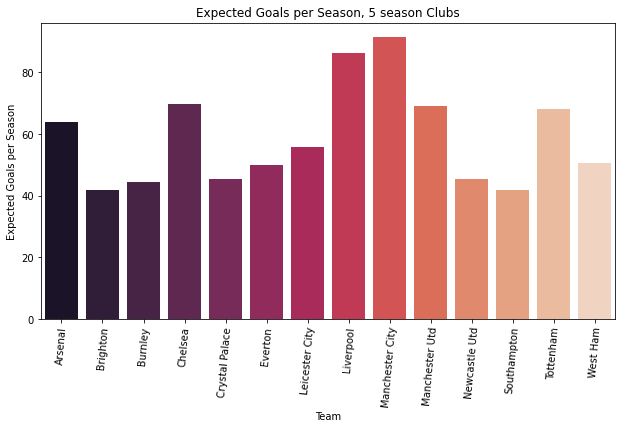

In [49]:
#I now want to tell the story of the past 5 seasons using xG only
#From the below graph, we can tell which teams have won titles (Man City & Liverpool), 
#which clubs competed for top 4 (Arsenal, Chelsea, Spurs and Man Utd), and
#which clubs were in relegation danger
#This graph looks very similar to the total points per season graph, 
#whereas shots and shots on target won't tell the same story

#size of graph
f = plt.figure(figsize=(35,12))
#Plot graph
ax = f.add_subplot(2,3,1)

#Allow spacing + rotation of names
plt.xticks(rotation=85)
#Plotting the datapoints
sns.barplot(x='Team', y='PPS', palette= 'rocket', data=df_totals1[(df_totals1['Seasons'] == 5.0) 
                                                                  & (df_totals1['xGPS'] >= 30)])

plt.title('Expected Goals per Season, 5 season Clubs')
plt.ylabel('Expected Goals per Season')

### 3.2 Regression Plot
* Create Seaborn Regression plot, displaying all team names
* Use for loop to add labels, adjust colors and size
* Adjust limits in order to keep all team names inside grid

(20.5, 93.6)

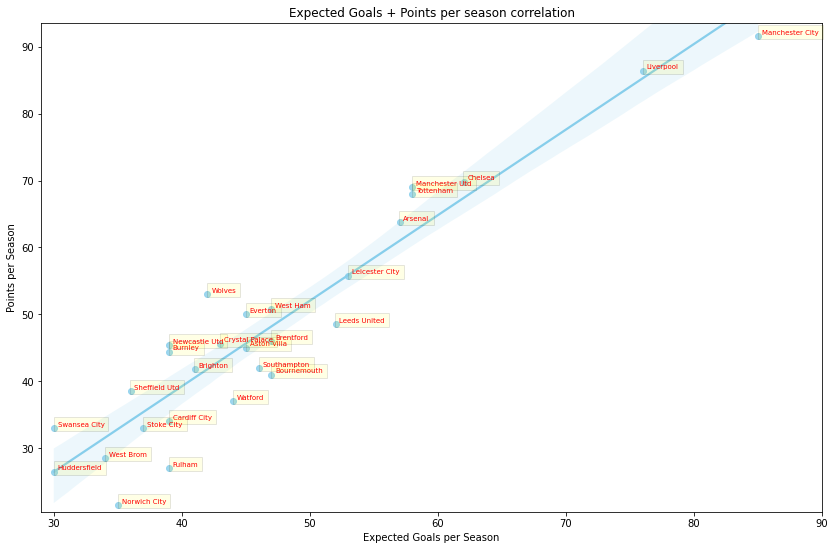

In [50]:
#By the way of seaborn diagram, I want to show the correlation between XG and Points in a season
#In order to label the data, I need to use a for loop

plt.figure(figsize=(14,9))
sns.regplot(data=df_totals1,x='xGPS',y='PPS', color='skyblue')
plt.title('Expected Goals + Points per season correlation')
plt.xlabel('Expected Goals per Season') #x label
plt.ylabel('Points per Season')
#Adding labels using a for loop, as well as colours and text size
for i in range(df_totals1.shape[0]):
 plt.text(x=df_totals1.xGPS[i]+0.3,y=df_totals1.PPS[i]+0.3,s=df_totals1.Team[i], 
          fontdict=dict(color='red',size=7),
          bbox=dict(facecolor='yellow',alpha=0.1))
#I want to keep all labels inside the grid
plt.xlim(df_totals1.xGPS.min()-1,df_totals1.xGPS.max()+5)                #set x limit
plt.ylim(df_totals1.PPS.min()-1,df_totals1.PPS.max()+2)

### 3.3 Metrics Comparisons on Regression Plots
* Create 3 seperate Seaborn regression plots, to understand how points per season varies with the independent variables
* Shots on Target, Shots and xG will be the independent variables

Text(0, 0.5, 'Points per Season')

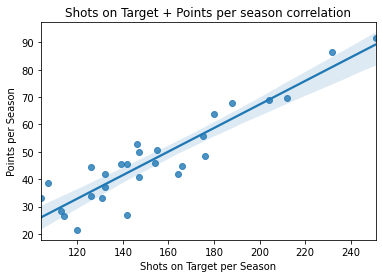

In [51]:
#show the difference between shots metrics, vs the xG graph we see above
#Notice how many outliers are present in these graphs
sns.regplot(x=df_totals1["STPS"], y=df_totals1["PPS"])
plt.title('Shots on Target + Points per season correlation')
plt.xlabel('Shots on Target per Season') #x label
plt.ylabel('Points per Season')

Text(0, 0.5, 'Points per Season')

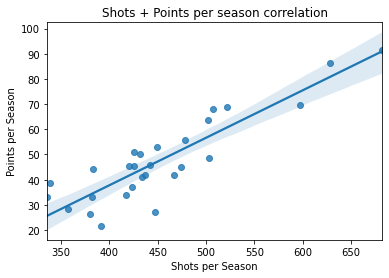

In [52]:
sns.regplot(x=df_totals1["SPS"], y=df_totals1["PPS"])
plt.title('Shots + Points per season correlation')
plt.xlabel('Shots per Season') #x label
plt.ylabel('Points per Season')

Text(0, 0.5, 'Points per Season')

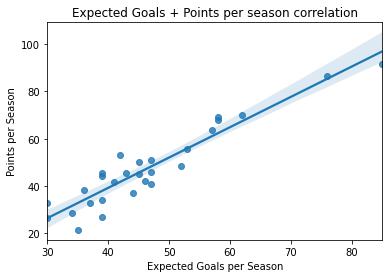

In [53]:
#show the same style of graph now for xG, to show the comparison
sns.regplot(x=df_totals1["xGPS"], y=df_totals1["PPS"])
plt.title('Expected Goals + Points per season correlation')
plt.xlabel('Expected Goals per Season') #x label
plt.ylabel('Points per Season')

# Step 4: Model Building

### 4.1 Update above dataframes to include each season
The objective of this is to create more datapoints for accuracy in the model

In [54]:
#Moving into the next part of the project, model building
#Firstly, I want to go back to original dataframes, and add up the xG and total points for each season
#That will give me more datapoints so the model is more accurate

#Add up home totals first, and rename home team as Team so it matches with away data
df_home2= df.groupby(['Season', 'HomeTeam',], as_index=False)['xg_home', 'HTP', 'HST'].sum()
df_home3=df_home2.rename(columns={'HomeTeam' : 'Team'})


<ipython-input-54-32b89b3468d0>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_home2= df.groupby(['Season', 'HomeTeam',], as_index=False)['xg_home', 'HTP', 'HST'].sum()


In [55]:
#Now the same for away 
df_away2= df.groupby(['Season', 'AwayTeam',], as_index=False)['xg_away', 'ATP', 'AST'].sum()
df_away3=df_away2.rename(columns={'AwayTeam' : 'Team'})

<ipython-input-55-7f627f25d526>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_away2= df.groupby(['Season', 'AwayTeam',], as_index=False)['xg_away', 'ATP', 'AST'].sum()


In [56]:
#Merge the two dataframes
df_seasons= pd.merge(df_home3, df_away3, on=['Team', 'Season'])

In [57]:
#Create new columns called Total xG and Total Points, by adding home and away data
df_seasons['TXG']= df_seasons['xg_home']+df_seasons['xg_away']
df_seasons['TP']= df_seasons['HTP']+df_seasons['ATP']
df_seasons['TST']= df_seasons['HST']+df_seasons['AST']
df_seasons

,Season,Team,xg_home,HTP,HST,xg_away,ATP,AST,TXG,TP,TST
0,1,Arsenal,35.7,41,116,24.1,28,81,59.8,69,197
1,1,Aston Villa,24.2,23,86,19.9,22,76,44.1,45,162
2,1,Brentford,26.7,24,77,21.0,22,77,47.7,46,154
3,1,Brighton,26.4,22,67,19.7,29,85,46.1,51,152
4,1,Burnley,21.1,21,73,17.8,14,52,38.9,35,125
...,...,...,...,...,...,...,...,...,...,...,...
95,5,Swansea City,19.9,21,69,10.4,12,35,30.3,33,104
96,5,Tottenham,35.8,43,120,31.7,34,97,67.5,77,217
97,5,Watford,24.0,27,70,23.4,14,62,47.4,41,132
98,5,West Brom,21.1,18,65,13.4,13,49,34.5,31,114


### Model 1: Linear Regression
* Import Libraries
* Split into training and test sets
* Fit model to train sets and print intercept and coefficient
* Create points predictions using xG variable
* Visualize the regression plot and check RMSE and r2 scores

In [58]:
#Importing libraries I'll need for linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
#Split data into training and test subsets
X= df_seasons[['TXG']]
y= df_seasons['TP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [60]:
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [61]:
print(lr.intercept_)
print(lr.coef_)

-6.725591709543622
[1.16994241]


In [62]:
#Predicting how many points a team will get if they have the below xG
predicted_price=lr.predict([[125], [225]])
print(predicted_price)

[139.51720933 256.51145015]


Text(0, 0.5, 'Points per Season')

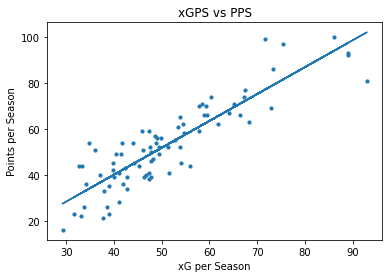

In [63]:
#Visualize on a regression plot
plt.scatter(X_train['TXG'], y_train, s=10)
y_pred= lr.predict(X_train)
plt.plot(X_train['TXG'], y_pred)
plt.title('xGPS vs PPS')
plt.xlabel('xG per Season')
plt.ylabel('Points per Season')

In [64]:
#Calculate RMSE and r2 scores on training set
RMSE= mean_squared_error(y_train, y_pred, squared=False)
r2= r2_score(y_train, y_pred)
print(RMSE)
print(r2)

8.732763376386723
0.7749702042340207


### 4.1 Shots on Target- Linear Regression
Now let's compare the above xG model with a the same Linear Regression model for Shots on Target

In [65]:
#Split data into training and test subsets
X1= df_seasons[['TST']]
y= df_seasons['TP']
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=25)

In [66]:
lr= LinearRegression()
lr.fit(X1_train, y_train)

LinearRegression()

In [67]:
print(lr.intercept_)
print(lr.coef_)

-13.811755951183144
[0.4015312]


In [68]:
#Predicting how many points a team will get if they have the below xG
predicted_price=lr.predict([[125], [225]])
print(predicted_price)

[36.37964419 76.53276431]


Text(0, 0.5, 'Points per Season')

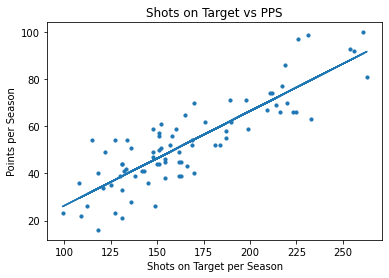

In [69]:
#Visualize on a regression plot
plt.scatter(X1_train['TST'], y_train, s=10)
y_pred= lr.predict(X1_train)
plt.plot(X1_train['TST'], y_pred)
plt.title('Shots on Target vs PPS')
plt.xlabel('Shots on Target per Season')
plt.ylabel('Points per Season')

In [70]:
#Calculate RMSE and r2 scores on training set
RMSE1= mean_squared_error(y_train, y_pred, squared=False)
r2_= r2_score(y_train, y_pred)
print(RMSE1)
print(r2_)

9.408297016201296
0.7388087164304439


### Model 2: Polynomial Regression
* Import Libraries
* Create features and fit model to training sets
* Print intercept and coefficient
* Create points predictions using same xG figures as above to check accuracy
* Visualize data and test RMSE and r2 scores on training and test sets

y_pred_test= lr.predict(X_test)
RMSE= mean_squared_error(y_test, y_pred_test, squared=False)
r2= r2_score(y_test, y_pred_test)
print(RMSE)
print(r2)

In [71]:
#Now I move onto the Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures

In [72]:
#Creating the features
poly_features= PolynomialFeatures(degree=2)
X_train_transformed= poly_features.fit_transform(X_train)
print(X_train_transformed[0])

[1.00000e+00 6.82000e+01 4.65124e+03]


In [73]:
pr= LinearRegression()
pr.fit(X_train_transformed, y_train)
print(pr.intercept_)
print(pr.coef_)

-24.14540610054945
[ 0.          1.81477337 -0.00553592]


In [74]:
#Making points predictions based on xG
num_transformed= poly_features.transform([[35], [75]])
predicted_points= pr.predict(num_transformed)
print(predicted_points)

[32.5901629  80.82306047]


Text(0, 0.5, 'Points')

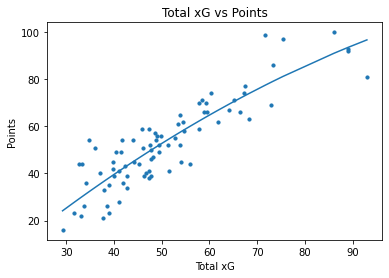

In [75]:
plt.scatter(X_train['TXG'], y_train, s=10)
y_pred= pr.predict(X_train_transformed)
sorted_zip= sorted(zip(X_train['TXG'], y_pred))
X_train_sorted, y_pred_sorted = zip(*sorted_zip)
plt.plot(X_train_sorted, y_pred_sorted)

plt.title('Total xG vs Points')
plt.xlabel('Total xG')
plt.ylabel('Points')

In [76]:
#Calculate RMSE and r2 on training set
RMSE1= mean_squared_error(y_train, y_pred, squared=False)
r2_= r2_score(y_train, y_pred)
print(RMSE1)
print(r2_)

8.614764781232228
0.7810104008908869


In [77]:
X_test_transformed= poly_features.transform(X_test)
y_pred_test= pr.predict(X_test_transformed)

In [78]:
#Calculate RMSE and r2 on test set
RMSE2= mean_squared_error(y_test, y_pred_test, squared=False)
r_2= r2_score(y_test, y_pred_test)
print(RMSE2)
print(r_2)

7.433040399323152
0.8373993066953999


### 4.2.2 Shots on Target- Polynomial Regression
Now let's compare the above xG model with a the same Linear Regression model for Shots on Target

In [79]:
#Creating the features
poly_features= PolynomialFeatures(degree=2)
X1_train_transformed= poly_features.fit_transform(X1_train)
print(X1_train_transformed[0])

[1.0000e+00 2.3300e+02 5.4289e+04]


In [80]:
pr= LinearRegression()
pr.fit(X1_train_transformed, y_train)
print(pr.intercept_)
print(pr.coef_)

-2.7240255249467893
[0.         0.27102662 0.00036334]


In [82]:
#Making points predictions based on xG
num_transformed1= poly_features.transform([[35], [75]])
predicted_points1= pr.predict(num_transformed)
print(predicted_points1)

[ 7.20700101 19.64677362]


Text(0, 0.5, 'Points')

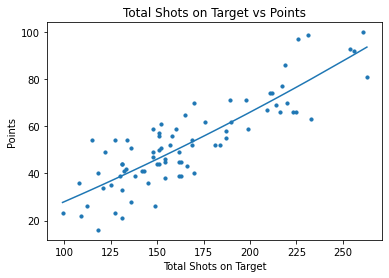

In [83]:
plt.scatter(X1_train['TST'], y_train, s=10)
y_pred= pr.predict(X1_train_transformed)
sorted_zip= sorted(zip(X1_train['TST'], y_pred))
X1_train_sorted, y_pred_sorted = zip(*sorted_zip)
plt.plot(X1_train_sorted, y_pred_sorted)

plt.title('Total Shots on Target vs Points')
plt.xlabel('Total Shots on Target')
plt.ylabel('Points')

In [84]:
#Calculate RMSE and r2 on training set
RMSE2= mean_squared_error(y_train, y_pred, squared=False)
r2_1= r2_score(y_train, y_pred)
print(RMSE2)
print(r2_1)

9.387846205730712
0.739942985031854


In [85]:
X1_test_transformed= poly_features.transform(X1_test)
y_pred_test= pr.predict(X1_test_transformed)

In [87]:
#Calculate RMSE and r2 on test set
RMSE3= mean_squared_error(y_test, y_pred_test, squared=False)
r_21= r2_score(y_test, y_pred_test)
print(RMSE3)
print(r_2)

7.885851965802316
0.8373993066953999
